In [1]:
%pip install pyreadstat --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
df = pd.read_spss('CCAM SPSS Data 2008-2022.sav')

In [3]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [4]:
# these are interesting to read through :)
misc_causes = df[df["cause_recoded"] == "Other (Please specify)"]["cause_other_text"]
for el in misc_causes:
    print(el)

god
The reason is because GOD wants it
because the Bible says all this will come to pass

everything is happening for a purpose
according to the Bible we are coming to the end of this world as we know it now .
only God can effect what is happening in the world
The end of time is nearing.
God
POLITICAL

with the world so hate mongered the lord will soon comr to take us home

God is in control.
gases in the air
It's probably not just one thing and some facts and statistics are misused.
It is the fulfillment of the HOLY BIBLE. I belive there will come a day when "we wont be able to tell the differences in the seasons" as the bible reads.
God End of Days

global warming has been going since cave man and dinosaurs,and since god walked this earth
God said that the seasons would change.
is a way to control people and a new way to make money by force to buy what they are creating

happens every so often
LORD
The Government is controling the weather and causing the glacial melts
God's plan for 

In [5]:
vars_to_remove = [
    "case_ID", "wave", "weight_wave", "weight_aggregate",
    "cause_original", "cause_other_text", # summarized by cause_recoded
    "age", "educ", "income", # other vars bin into categories
    "ideology", "party", "party_w_leaners", # summarized by party_x_ideo
    "region4", # using region9 instead
    "religion_other_nonchristian", # diverse answers, not super important
    "house_ages0to1", "house_ages2to5", "house_ages6to12", "house_ages13to17", "house_ages18plus", # not sure how to deal with
]
df_filtered = df.drop(vars_to_remove, axis=1)
df_filtered.columns

Index(['year', 'happening', 'cause_recoded', 'sci_consensus', 'worry',
       'harm_personally', 'harm_US', 'harm_dev_countries', 'harm_future_gen',
       'harm_plants_animals', 'when_harm_US', 'reg_CO2_pollutant',
       'reg_utilities', 'fund_research', 'reg_coal_emissions', 'discuss_GW',
       'hear_GW_media', 'gender', 'age_category', 'generation',
       'educ_category', 'income_category', 'race', 'party_x_ideo',
       'registered_voter', 'region9', 'religion', 'evangelical',
       'service_attendance', 'marit_status', 'employment', 'house_head',
       'house_size', 'house_type', 'house_own'],
      dtype='object')

In [99]:
df_important = df[[
    "happening",
    "worry",
    "harm_plants_animals",
    "harm_future_gen",
    "harm_US",
    "party_x_ideo",
    "reg_CO2_pollutant",
    "ideology",
    "discuss_GW",

    "evangelical",
    "party_w_leaners",
    "service_attendance",
    "house_size",
    "hear_GW_media",
    "religion"
]]

In [114]:
df_income_edu_party = df[["income_category", "educ_category", "party", "happening"]]

In [115]:
df_to_analyze = df_income_edu_party


from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# prepare a transaction list by converting each data point
# to ['attr1: val1', 'attr2: val2'] and creating a list of
# all data points


transaction_list = []

column_names = df_to_analyze.columns.to_numpy().astype(str)
colons = np.full(column_names.size, ": ")
prefixes = np.char.add(column_names, colons)

df_sample = df_to_analyze.sample(n=10000, random_state=7)

for i in range(len(df_filtered_sample)):
    values = df_sample.iloc[i].values.astype(str)
    items = np.char.add(prefixes, values)
    transaction_list.append(items)


# convert into a pandas dataframe with True/False for each possible item in each row
# the mlxtend library requires this format to do frequent pattern matching

encoder = TransactionEncoder()
encoded_array = encoder.fit(transaction_list).transform(transaction_list)
tdb = pd.DataFrame(encoded_array, columns = encoder.columns_)

In [119]:
freq_patterns = fpgrowth(tdb, min_support=0.01, use_colnames=True)
freq_patterns

,support,itemsets
0,0.6763,(happening: Yes)
1,0.3593,(educ_category: Bachelor's degree or higher)
2,0.3389,"(income_category: $50,000 to $99,999)"
3,0.3326,(party: Democrat)
4,0.2931,"(income_category: $100,000 or more)"
...,...,...
221,0.0194,"(party: Democrat, educ_category: Less than high school, happening: Yes)"
222,0.0195,"(party: Democrat, educ_category: Less than high school, income_category: Less than $50,000)"
223,0.0145,"(party: Democrat, educ_category: Less than high school, income_category: Less than $50,000, happening: Yes)"
224,0.0132,"(happening: Don't know, educ_category: Less than high school, income_category: Less than $50,000)"


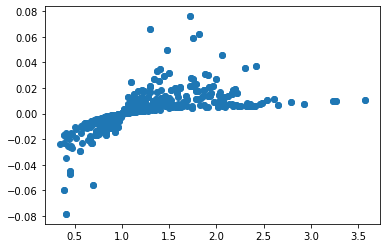

In [120]:
rules = association_rules(freq_patterns, metric="confidence", min_threshold=0.1)
plt.scatter(rules["lift"], rules["leverage"])

In [124]:
# high lift and leverage
rules[(rules["leverage"] > 0.02) & (rules["lift"] > 1.5)].sort_values(by=["support"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74,"(income_category: $100,000 or more)",(educ_category: Bachelor's degree or higher),0.2931,0.3593,0.1814,0.618901,1.722520,0.076089,1.681192,0.593373
75,(educ_category: Bachelor's degree or higher),"(income_category: $100,000 or more)",0.3593,0.2931,0.1814,0.504871,1.722520,0.076089,1.427708,0.654683
80,"(income_category: $100,000 or more, happening: Yes)",(educ_category: Bachelor's degree or higher),0.2110,0.3593,0.1378,0.653081,1.817647,0.061988,1.846827,0.570137
82,"(happening: Yes, educ_category: Bachelor's degree or higher)","(income_category: $100,000 or more)",0.2676,0.2931,0.1378,0.514948,1.756901,0.059366,1.457369,0.588225
83,"(income_category: $100,000 or more)","(happening: Yes, educ_category: Bachelor's degree or higher)",0.2931,0.2676,0.1378,0.470147,1.756901,0.059366,1.382269,0.609444
85,(educ_category: Bachelor's degree or higher),"(income_category: $100,000 or more, happening: Yes)",0.3593,0.2110,0.1378,0.383524,1.817647,0.061988,1.279854,0.702104
253,(happening: No),(party: Republican),0.1560,0.2758,0.0887,0.568590,2.061602,0.045675,1.678681,0.610119
252,(party: Republican),(happening: No),0.2758,0.1560,0.0887,0.321610,2.061602,0.045675,1.244122,0.711047
92,"(party: Democrat, income_category: $100,000 or more)",(educ_category: Bachelor's degree or higher),0.0970,0.3593,0.0657,0.677320,1.885109,0.030848,1.985556,0.519963
93,"(party: Democrat, educ_category: Bachelor's degree or higher)","(income_category: $100,000 or more)",0.1294,0.2931,0.0657,0.507728,1.732269,0.027773,1.435995,0.485553


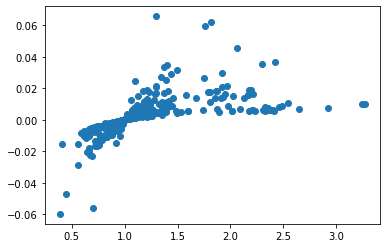

In [137]:
# filter out obvious / not interesting rules

def in_antecedent(s):
    return rules["antecedents"].apply(lambda tup: any(s in tuple_elem for tuple_elem in tup))
def in_consequent(s):
    return rules["consequents"].apply(lambda tup: any(s in tuple_elem for tuple_elem in tup))

def either_direction(s1, s2):
    return (in_antecedent(s1) & in_consequent(s2)) | (in_antecedent(s2) & in_consequent(s1))

# harm <-> harm
harm_pair = in_antecedent("harm_") & in_consequent("harm_")

# harm <-> caused mostly by human activities
harm_human_caused = either_direction("harm_", "cause_recoded: Caused mostly by human activities")

# age category <-> generation
age_generation = either_direction("age_category:", "generation:")

# house pair
house_pair = in_antecedent("house_") & in_consequent("house_")

# party <-> party
party_pair = in_antecedent("party_") & in_consequent("party_")

# party <-> ideology
party_ideology = either_direction("party_", "ideology")

# NaN
nan = in_antecedent(": nan") | in_consequent(": nan")



interesting_consequent = np.any((
    in_consequent("happening:"),
    in_consequent("cause_recoded:"),
    in_consequent("sci_consensus:"),
    in_consequent("worry:")
), axis=0)



filter_criteria = np.all((
    ~harm_pair,
    ~harm_human_caused,
    ~age_generation,
    ~house_pair,
    ~party_pair,
    ~party_ideology,
    interesting_consequent,
    ~nan
), axis=0)

filtered_rules = rules[filter_criteria]

import matplotlib.pyplot as plt
plt.scatter(filtered_rules["lift"], filtered_rules["leverage"])

In [138]:
# filter for lift and leverage
pd.options.display.max_colwidth = 500
filtered_rules[(filtered_rules["leverage"] > 0.02) & (filtered_rules["lift"] > 2)].sort_values(by=["leverage"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
252,(party: Republican),(happening: No),0.2758,0.1560,0.0887,0.321610,2.061602,0.045675,1.244122,0.711047
102,"(party: Democrat, income_category: $100,000 or more)","(happening: Yes, educ_category: Bachelor's degree or higher)",0.0970,0.2676,0.0628,0.647423,2.419367,0.036843,2.077275,0.649689
104,"(party: Democrat, educ_category: Bachelor's degree or higher)","(income_category: $100,000 or more, happening: Yes)",0.1294,0.2110,0.0628,0.485317,2.300080,0.035497,1.532982,0.649245


In [43]:
# Other filtering attempts

# Young age
young = in_antecedent("age_category: 18-34 years")
rules[young].sort_values(by=["leverage"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1124082,(age_category: 18-34 years),(generation: Millennials (1981 - 1996)),0.2070,0.1920,0.1642,0.793237,4.131441,0.124456,3.907850,0.955805
1124136,"(registered_voter: Registered, age_category: 18-34 years)",(generation: Millennials (1981 - 1996)),0.1523,0.1920,0.1208,0.793171,4.131101,0.091558,3.906616,0.894106
1124140,(age_category: 18-34 years),"(registered_voter: Registered, generation: Millennials (1981 - 1996))",0.2070,0.1433,0.1208,0.583575,4.072400,0.091137,2.057273,0.951380
1124106,"(age_category: 18-34 years, happening: Yes)",(generation: Millennials (1981 - 1996)),0.1449,0.1920,0.1147,0.791580,4.122815,0.086879,3.876795,0.885800
1124109,(age_category: 18-34 years),"(generation: Millennials (1981 - 1996), happening: Yes)",0.2070,0.1355,0.1147,0.554106,4.089345,0.086651,1.938803,0.952663
1124128,(age_category: 18-34 years),"(race: White, Non-Hispanic, generation: Millennials (1981 - 1996))",0.2070,0.1249,0.1079,0.521256,4.173387,0.082046,1.827908,0.958873
1124124,"(age_category: 18-34 years, race: White, Non-Hispanic)",(generation: Millennials (1981 - 1996)),0.1352,0.1920,0.1079,0.798077,4.156651,0.081942,4.001524,0.878147
1124118,"(evangelical: No, age_category: 18-34 years)",(generation: Millennials (1981 - 1996)),0.1333,0.1920,0.1075,0.806452,4.200269,0.081906,4.174667,0.879105
1124122,(age_category: 18-34 years),"(evangelical: No, generation: Millennials (1981 - 1996))",0.2070,0.1249,0.1075,0.519324,4.157916,0.081646,1.820560,0.957749
1124077,"(age_category: 18-34 years, happening: Yes)",(cause_recoded: Caused mostly by human activities),0.1449,0.5280,0.1058,0.730159,1.382876,0.029293,1.749176,0.323786


In [14]:
len(df)

30136

In [15]:
# The dataset has NaN? I thought the value would be the 'Refused' category if no response
# Oh this is probably the years the question wasn't asked; as opposed to asked and not answered
df["reg_utilities"]

0        Strongly support
1        Somewhat support
2         Strongly oppose
3        Strongly support
4         Strongly oppose
               ...       
30131                 NaN
30132                 NaN
30133                 NaN
30134                 NaN
30135                 NaN
Name: reg_utilities, Length: 30136, dtype: category
Categories (5, object): ['Refused', 'Somewhat oppose', 'Somewhat support', 'Strongly oppose', 'Strongly support']